# BPL_TEST2_Batch - demo

In [1]:
run -i BPL_TEST2_Batch_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for the process has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

No processDiagram.png file in the FMU, but try the file on disk.


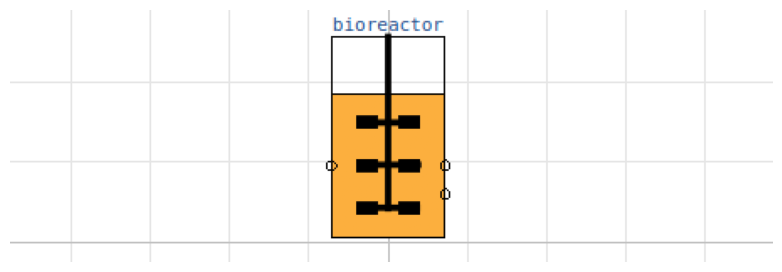

In [3]:
process_diagram()

disp('bioreactor', mode='long')

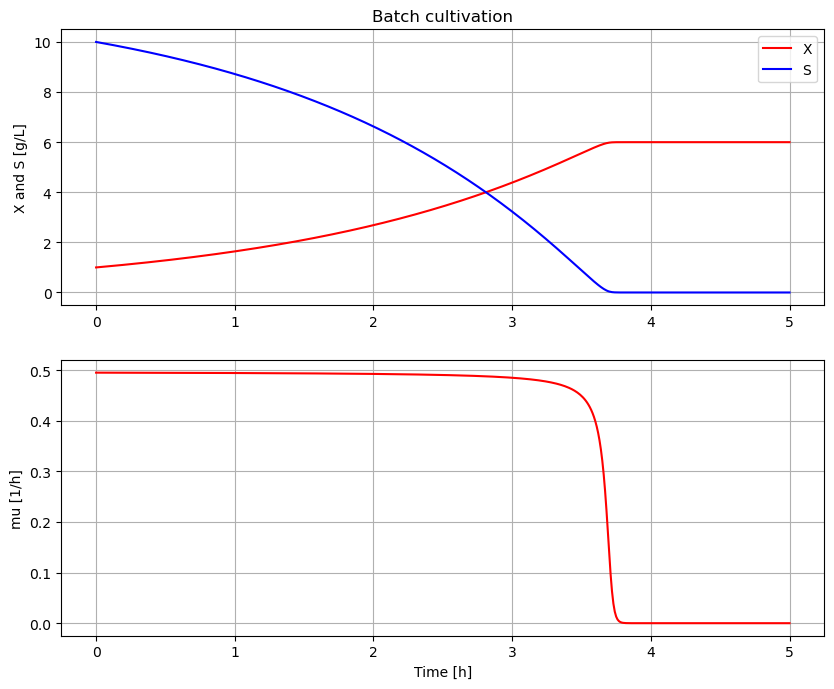

In [4]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

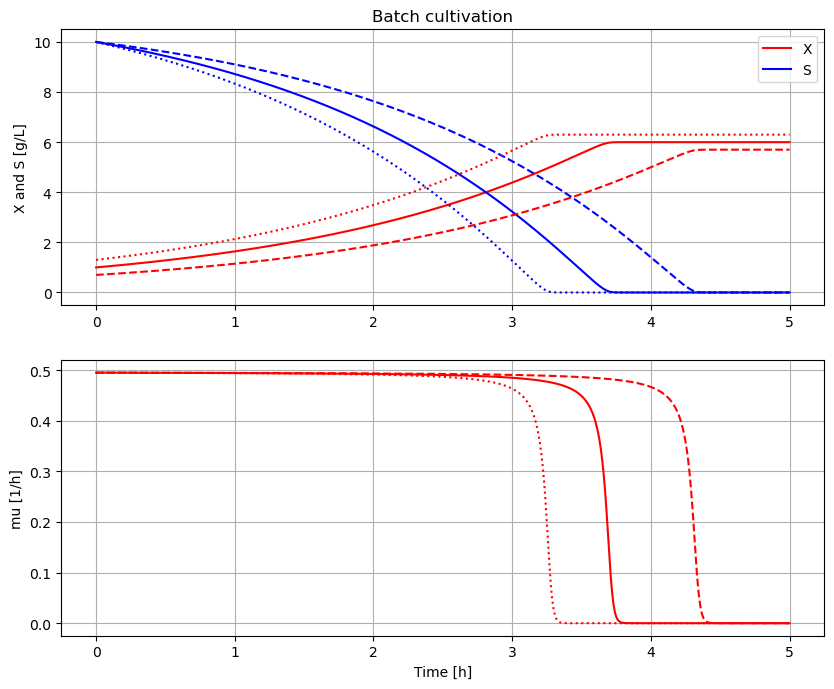

In [5]:
# Simulation were initial value of biomass VX_0 is varied
newplot(plotType='TimeSeries') 
for value in [1.0, 0.7, 1.3]: init(VX_start=value); simu(5)

# Restore default value of VX_0
init(VX_start=1.0)

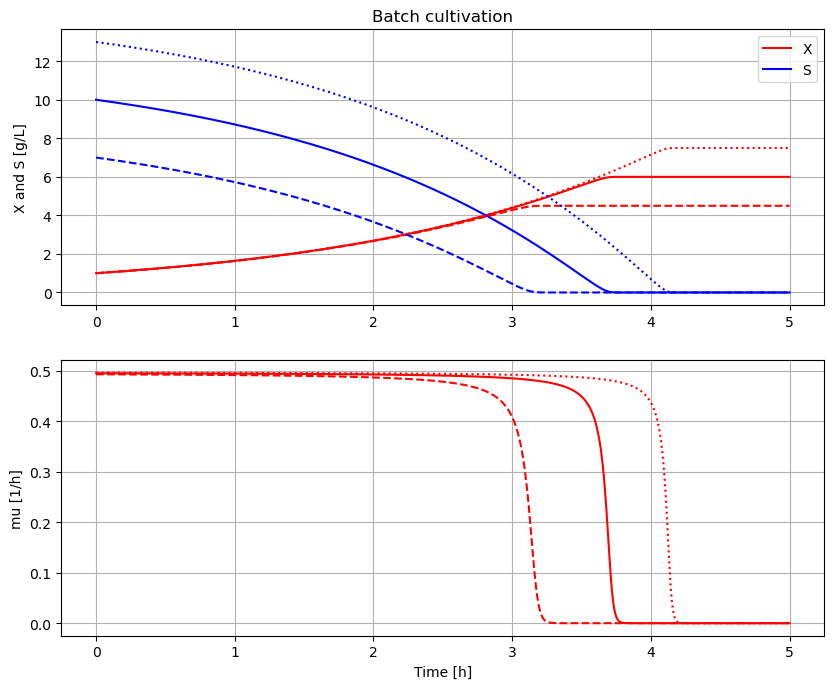

In [6]:
# Simulation were initial value of substrate VS_start is varied
newplot(plotType='TimeSeries') 
for value in [10, 7, 13]: init(VS_start=value); simu(5)

# Restore default value of VS_start
init(VS_start=10)

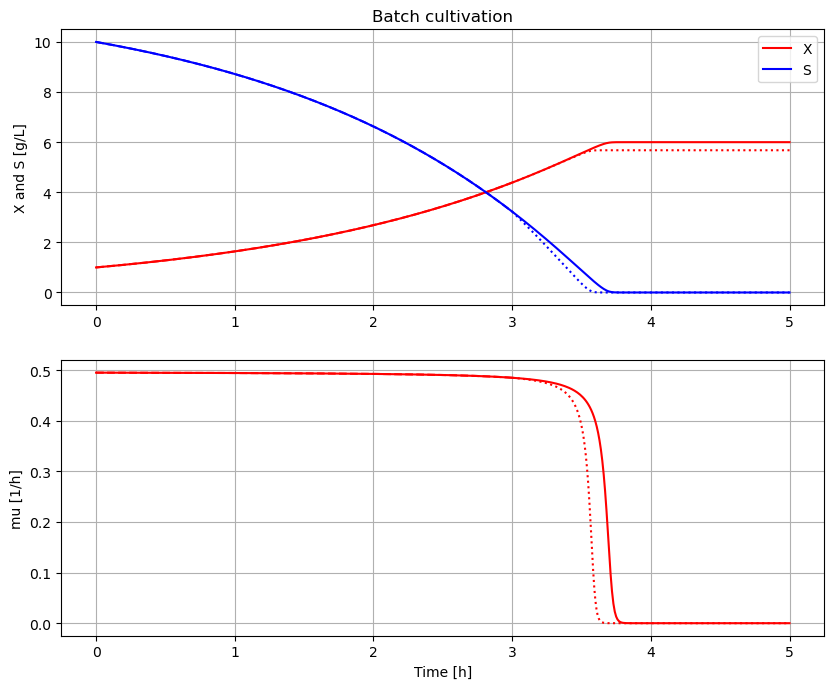

In [7]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries') 
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [8]:
disp('culture')

Y : 0.4
qSmax : 1.25
Ks : 0.1


In [9]:
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [10]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'MSL']


In [11]:
describe('MSL')

MSL: none


In [12]:
system_info()


System information
 -OS: Windows
 -Python: 3.12.11
 -Scipy: not installed in the notebook
 -PyFMI: 2.17.4
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: FMUModelCS2
 -Name: BPL.Examples_TEST2.Batch
 -Generated: 2025-07-26T09:37:39
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.3.1
 -Interaction: FMU-explore version 1.0.0
